<a href="https://colab.research.google.com/github/Junoflows/DeepLearning_From_Scratch1/blob/main/chapter_3_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3 신경망

+ 퍼셉트론의 장점 : 복잡한 함수도 표현할 수 있음
+ 퍼셉트론의 단점 : 가중치를 설정하는 작업은 사람이 수동으로 해야함
+ 신경망은 가중치 매개변수를 데이터로부터  자동으로 학습하여 퍼셉트론의 단점을 해결할 수 있음

In [ ]:
# Python 코드 작성 시 warning 무시시
import warnings
warnings.filterwarnings('ignore')

## 3.1 퍼셉트론에서 신경망으로

### 3.1.1 신경망의 예

<img src='http://drive.google.com/uc?export=view&id=1pjGJlhU9AB-GrHbpe1mLttvlBXQ3JRSC' height = 200/><br>

+ 신경망을 그림으로 나타내면 위 그림처럼 된다.  
+ 가장 왼쪽 줄을 __입력층__, 맨 오른쪽 줄을 __출력층__, 중간 줄을 __은닉층__ 이라고 한다.  
+ 은칙층의 뉴런은 사람 눈에는 보이지 않는다.  
+ 입력층에서 출력층의 방향으로 차례로 0층, 1층, 2층이라고 한다.  
(파이썬 배열의 인덱스도 0부터 시작하여, 구현할 때 용이함)
+ 위 그림에서는 0층이 입력층, 1층이 은닉층, 2층이 출력층이 된다.

__NOTE__  
위 신경망은 3층으로 구성되지만, 가중치를 갖는 층은 2개뿐이므로 __2층 신경망__ 이라고 한다.

위 신경망은 앞 장에서 본 퍼셉트론과 특별히 달라진 것이 없어보인다.  
그럼 신경망에서는 신호를 어떻게 전달할까?

### 3.1.2 퍼셉트론 복습

<img src='http://drive.google.com/uc?export=view&id=1_9nHL9y5rA39t3hQor6EioYXmg-twKkr' /><br>

+ $x_1, x_2$ 라는 두 신호를 입력받아 $y$ 를 출력하는 퍼셉트론이다.  
+ 수식으로 나타내보자.
$y =
\begin{cases}
0 \;(b + w_1x_1 + w_2x_2 \leq 0)\\
1 \;(b + w_1x_1 + w_2x_2 > 0)
\end{cases}$   [식 3.1]


+ $b$ 는 __편향__을 나타내는 매개변수로, 뉴런이 얼마나 쉽게 활성화되느냐를 제어한다.  
+ $w_1, w_2$ 는 각 신호의 __가중치__를 나타내는 매개변수로, 각 신호의 영향력을 제어한다.
+ 위 그림의 퍼셉트론에서는 편향 $b$ 가 명시되지 않았고, 여기에 편향을 명시한다면 아래 그림과 같이 나타낼 수 있다.

<img src='http://drive.google.com/uc?export=view&id=1-Io-VDZLA0-TkvnVtlwjoTWMmErw6pxT' height = 300 /><br>
위 그림에서는 가충치가 $b$ 이고 입력이 1인 뉴런이 추가되었다.


__위 퍼셉트론의 동작__  
1. $x_1, x_2$, 1이라는 3개의 신호가 뉴런에 입력되어, 각 신호에 가중치를 곱한 후, 다음 뉴런에 전달된다.
2. 다음 뉴런에서 이 신호들의 값을 더하여 그 합이 0을 넘으면 1, 넘지 않으면 0 을 출력한다.

$y =
\begin{cases}
0 \;(b + w_1x_1 + w_2x_2 \leq 0)\\
1 \;(b + w_1x_1 + w_2x_2 > 0)
\end{cases}$ <br/><br/>
+ 이 수식을 좀 더 간결한 형태로 다시 작성해보자.  
+ 조건 분기의 동작(0을 넘으면 1, 넘지 않으면 0을 출력하는 조건)을 하나의 함수로 나타낸다.  
+ 이 함수를 $h(x)$ 라 하면 위 수식을 다음과 같이 표현할 수 있다.


$ y = h(b+w_1x_1+w_2x_2)$  <br/><br/>
$h(x) =
\begin{cases}
0 \;(x \leq 0)\\
1 \;(x > 0)
\end{cases}$

### 3.1.3 활성화 함수의 등장

+ $h(x)$ 와 같이 입력 신호의 총합을 출력 신호로 변환하는 함수를 __활성화 함수__ 라고 한다.
+ 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지 정하는 역할을 한다.

$ y = h(b+w_1x_1+w_2x_2)$  <br/><br/>
$h(x) =
\begin{cases}
0 \;(x \leq 0)\\
1 \;(x > 0)
\end{cases}$

+ 위 식을 보면, 가중치가 곱해진 입력 신호의 종합을 계산하고  
그 합을 활성화 함수에 입력해 결과를 내는 2단계로 처리된다.
+ 즉, 이 식은 다음과 같은 2개의 식으로 나눌 수 있다.

$ a = b + w_1x_1 + w_2x_2$<br/>
$ y = h(a)$

+ 가중치가 달린 입력 신호와 편향의 총합을 계산하고, 이를 $a$ 라 한다.
+ $a$ 를 함수 $h()$에 넣어 $y$를 출력한다.
+ 지금까지의 처리 과정을 그려보면 아래와 같이 나타낼 수 있다.

<img src='http://drive.google.com/uc?export=view&id=1iAeObZ50sbwL1uBVT7aIjcflbV4nI__F' height = 300 /><br>
기존 뉴런의 원을 키우고, 그 안에 활성화 함수의 처리 과정을 그려넣었음

+ 가중치 신호를 조합한 결과가 $a$라는 노드가 되고, 활성화 함수 $h()$ 를 통과하여  
$y$ 라는 노드로 변환되는 과정이 분명하게 나타나 있다.  
(노드와 뉴런은 같은 용어라고 봐도 무방함)

<img src='http://drive.google.com/uc?export=view&id=1m-V-cG9Bw2Dxx-Rf6VzrWXblsMzbaXnt' height = 150 /><br>
뉴런을 그랠 때 보통 하나의 원으로 그린다.  
신경망의 동작을 명확히 드러내고자 할 때는 활성화 처리 과정을 명시하기도 한다.  


__NOTE__  
__단순 퍼셉트론__ : 단층 네트워크에서 계단 함수를 활성화 함수로 사용한 모델  
__다층 퍼셉트론__ : 신경망(여러 층으로 구성되고 시그모이드 함수 등의 활성화 함수를 사용한 네트워크)  
활성화 함수가 퍼셉트론에서 신경망으로 가는 중요한 역할을 한다.

## 3.2 활성화 함수

$h(x) =
\begin{cases}
0 \;(x \leq 0)\\
1 \;(x > 0)
\end{cases}$ <br/>
+ 이와 같은 활성화 함수는 임계값을 경계로 출력이 바뀌는데, 이런 함수를 __계단 함수__라고 한다.  
+ 즉, 퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다고 할 수 있다.
+ 계단 함수 이외의 함수를 이용하면 어떻게 될까?

### 3.2.1 시그모이드 함수

+ 시그모이드 함수는 신경망에서 자주 이용하는 활성화 함수이다.  

$ h(x) = \frac{1}{1+e^{-x}}$
+ 신경망에서는 시그모이드 함수를 이용하여 신호를 변환하고,  
변환된 신호를 다음 뉴런에  전달한다.
+ 시그모이드 함수와 계단 함수와 비교해보자.

### 3.2.2 계단 함수 구현하기

+ 계단 함수는 입력이 0을 넘으면 1, 넘지 않으면  0을 출력하는 함수이다.
+ 아래는 계단 함수를 단순하게 구현한 코드이다.

In [ ]:
import numpy as np
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

+ 이 구현은 단순하지만 $x$는 실수만 받아들인다.
+ 즉 step_function(3.0)은 되지만 step_function(np.array([1.0,2.0]))은 안된다.
+ 넘파이 배열도 입력할 수 있도록 코드를 수정하자.

In [ ]:
def step_function(x):
  y = x > 0
  return y.astype(np.int)

+ 위 코드에 x에 넘파이 배열 넣어보자.

In [ ]:
x = np.array([-1.0,1.0,2.0])
y = step_function(x)
print(y)

[0 1 1]


+ astype() 메서드를 이용하여 bool을 int로 변환할 수 있다. (True는 1, False는 0)
+ 이처럼 계단 함수를 구현할 수 있다.

### 3.2.3 계단 함수의 그래프

+ 앞에서 정의한 계단 함수를 그래프로 그려보자
+ 그래프를 그리기 위해 matplotlib 라이브러리를 사용한다.

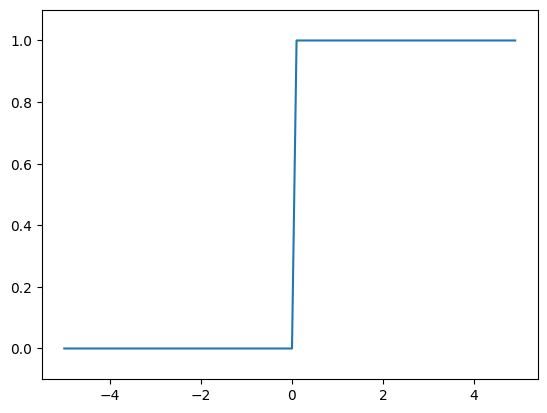

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

+ np.arange(-5.0, 5.0, 0.1)은 -5.0 에서 5.0 전까지 0.1 간격으로 넘파이 배열을 생성한다.
+ 계단 함수는 0을 경계로 출력이 0에서 1(또는 1에서 0)으로 바뀐다.
+ 그래프를 보면 형태가 계단처럼 생겼기 때문에 계단함수라고 불린다.

### 3.2.4 시그모이드 함수 구현하기

+ 시그모이드 함수를 구현해보자.

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

+ 시그모이드 함수를 그래프로 구현해보자.

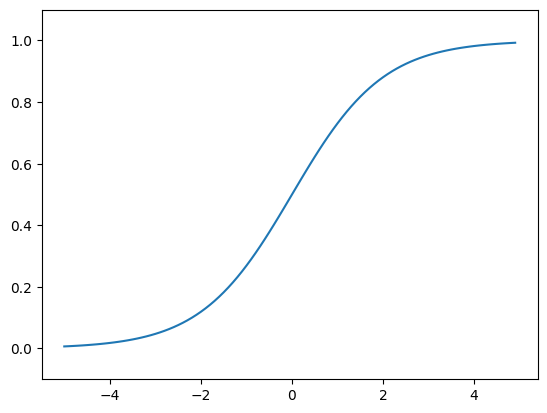

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

__NOTE__  
시그모이드란 'S자 모양' 이라는 뜻이다.

### 3.2.5 시그모이드 함수와 계단 함수 비교

+ 시그모이드랑 계단 함수의 공통점과 차이점을 비교해보자.

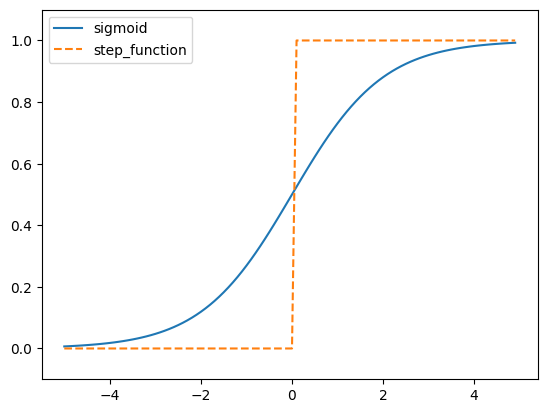

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)
plt.plot(x,y1, label = 'sigmoid')
plt.plot(x,y2, linestyle = 'dashed', label = 'step_function')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

__차이점__
+ 시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변한다.
+ 계단 함수는 0을 경계로 출력이 불연속적으로 바뀐다.
+ 퍼셉트론은 뉴런 사이에 0,1 값만 흘렀다면, 신경망에서는 연속적인 실수가 흐른다.
+ 시그모이드 함수의 연속성이 신경망 학습에서 아주 중요한 역할을 하게 된다.

__공통점__
+ 두 함수 모두 입력이 작을 때의 출력은 0에 가깝고 클 때의 출력은 1에 가깝다.
+ 입력하는 숫자와 상관없이 0과 1 사이의 값이 출력된다.

### 3.2.6 비선형 함수

+ 시그모이드 함수와 계단 함수 모두 비선형 함수이다.

__NOTE__  
활성화 함수를 설명할 때 비선형 함수와 선형 함수라는 용어가 자주 등장한다.  
출력이 입력의 상수배만큼 변하는 함수를 선형 함수라고 한다.  
수식으로는 $f(x) = ax + b$ 이다. ($a,b$ 는 상수)  
비선형 함수는 선형이 아닌 함수이다.



+ 신경망에서는 활성화 함수로 선형 함수를 사용하면 안된다.  
선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문
+ 선형 함수로 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로 똑같은 기능을 할 수 있다.

$h(x) = cx $ 를 활성화 함수로 사용한 3층 네트워크를 생각해보자. 이를 식으로 나타내면  
$y(x) = h(h(h(x)))$ 이다. 이를 식으로 나타내면
$ a = c^3 $인 $ y(x) = ax$ 와 똑같은 식이다.  
즉 선형 함수로는 여러 층을 구성할 수 없으므로 비선형 함수를 사용해야 한다.


### 3.2.7 ReLU 함수

+ 시그모이드 함수는 신경망 분야에서 오래전부터 이용해왔으나 최근에는 ReLu 함수를 주로 이용한다.
+ ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하면 0을 출력하는 함수이다.

<img src='http://drive.google.com/uc?export=view&id=1cqBNP0wZDvLAxtf0QlGE1UMIbN4toA4l' height = 300 /><br>

+ 수식으로는 다음과 같다.  
$h(x) =
\begin{cases}
 \;(x > 0)\\
1 \;(x \leq 0)
\end{cases}$

+ 위 식을 구현해보자.

In [ ]:
def relu(x):
  return np.maximum(0,x)

+ maximum 함수는 두 입력 중 큰 값을 선택해 반환하는 함수이다.
+ 지금은 시그모이드 함수를 활성화 함수로 사용하지만, 후반부는 주로 ReLU 함수를 사용한다.

## 3.3 다차원 배열의 계산

+ 넘파이의 다차원 배열을 사용하여 신경망을 효율적으로 구현할 수 있다.

### 3.3.1 다차원 배열

+ 넘파이를 사용해서 다차원 배열을 작성해보자.

In [ ]:
import numpy as np
# 1차원 배열
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


+ 배열의 차원 수는 np.ndim() 함수로 알 수 있다.
+ 배열의 형상은 shape으로 알 수 있다.
+ shape은 튜플을 반환하는 것에 주의하자.

In [ ]:
# 2차원 배열
B = np.array([[1,2],[3,4],[5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


+ 3×2 배열으로 처음 차원(0차원)에는 원소가 3개, 다음 차원(1차원)에는 원소가 2개 있다는 의미이다.
+ 2차원 배열은 행렬이라고 부르고 가로 방향을 행, 세로 방향을 열이라고 한다.

<img src='http://drive.google.com/uc?export=view&id=1b-n_wx2lJ6JA2WclH4Xm06lxsdsYkPR-' height = 200/><br>

### 3.3.2 행렬의 곱

+ 파이썬으로 행렬의 곱을 구현해보자

In [ ]:
A = np.array([[1,2],[3,4]])
print(A.shape)
B = np.array([[5,6],[7,8]])
print(B.shape)
print(np.dot(A,B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


+ A와 B는 2×2 행렬이며, 두 행렬의 곱은 넘파이 함수 np.dot()으로 계산한다.
+ np.dot()은 입력이 1차원 배열이면 벡터를, 2차원 배열이면 행렬 곱을 계산한다.
+ np.dot(A,B)와 np.dot(B,A)는 다른 값이 될 수 있다.
+ 2×3 행렬과 3×2 행렬의 곱을 구현해보자.

In [ ]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])
print(A.shape)
print(B.shape)
print(np.dot(A,B))

(2, 3)
(3, 2)
[[22 28]
 [49 64]]


+ 행렬의 곱 연산을 할 때는 형상에 주의해야 한다. 형상이 맞지 않으면 행렬의 곱을 계산할 수 없다.
+ 2×3 행렬과 2×2 행렬을 곱하면 다음과 같이 오류가 발생한다.

In [ ]:
C = np.array([[1,2],[3,4]])
print(C.shape)
print(A.shape)
np.dot(A,C)

(2, 2)
(2, 3)


ValueError: ignored

+ 즉 다차원 배열을 곱하려면 두 행렬의 대응하는 차원의 원소 수를 일치시켜야 한다.

<img src='http://drive.google.com/uc?export=view&id=19AwmEkPQFnQXFI_zniaMOvEr3NeG670I' /><br>
<img src='http://drive.google.com/uc?export=view&id=1jQk6hNCRyn2ql4p0MlgMC86TCzSfAOVf' /><br>
+ [그림 3-13] 을 파이썬으로 구현하면 다음과 같다.

In [ ]:
A = np.array([[1,2],[3,4],[5,6]])
B = np.array([7,8])
print(A.shape)
print(B.shape)
print(np.dot(A,B))

(3, 2)
(2,)
[23 53 83]


### 3.3.3 신경망에서의 행렬 곱

+ 넘파이 행렬을 사용해서 신경망을 구현해보자.
+ 아래 신경망은 편향과 활성화 함수를 생략하고 가중치만 갖는다.

<img src='http://drive.google.com/uc?export=view&id=1rOpMIN9orix816gUw8gE8B8zH0oBB7HX' /><br>

+ 이 구현에서도 $X, W, Y$의 형상을 주의해서 보자.
+ $X$와 $W$ 의 대응하는 차원의 원소 수가 같아야 한다

In [ ]:
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])

print(X.shape)
print(W)
print(W.shape)

Y = np.dot(X,W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


+ Y의 원소 개수와 상관없이 np.dot 함수를 사용하면 한 번의 연산으로 계산할 수 있다.

## 3.4 3층 신경망 구현하기

+ 3층 신경망에서 수행되는 입력부터 출력까지의 처리(순방향 처리)를 구현해보자.

<img src='http://drive.google.com/uc?export=view&id=1-tgKVUxErusQubHkRXiYsHMVXTh3lenn' height = 200/><br>

### 3.4.1 표기법 설명

<img src='http://drive.google.com/uc?export=view&id=1kVIjBkfGRaiWCimwrufkzbdKskIPL3Eo' height = 200 /><br>

+ 위 그림은 입력층의 뉴런 $x_2$ 에서 다음 층의 뉴런  $a_1^{(1)} $ 으로 향하는 선 위에 가중치를 표시한다.
+ 가중치와 은닉층 뉴런의 오른쪽 위에는 '(1)'이 붙어있는데,  
이는 1층의 가중치, 1층의 뉴런임을 뜻하는 번호이다.
+ 가중치 오른쪽 아래의 두 숫자는 차례로 다음 층 뉴런과 앞 층 뉴런의 인덱스이다.
+ $w_{12}^{(1)}$은 앞 층의 2번째 뉴런($x_2$)에서 다음 층의 1번째 뉴런($a_1^{(1)}$)으로 향할 때의 가중치라는 뜻이다.
+ 가중치 오른쪽 아래의 인덱스 번호는 '다음 층 번호, 앞 층 번호' 순으로 적는다.


### 3.4.2 각 층의 신호 전달 구현

+ 입력층에서 '1층의 첫 번째 뉴런'으로 가는 신호를 살펴보자.

<img src='http://drive.google.com/uc?export=view&id=1FbIq8m460lHROcZjSqUYsKoWi4hraUtk' height = 200/><br>

+ 편향을 뜻하는 뉴런인 ①이 추가되었다.
+ 편향은 앞 층의 편향 뉴런이 하나뿐이므로 오른쪽 아래 인덱스가 하나밖에 없다는 것을 주의하자.
+ $a_1^{(1)}$ 을 수식으로 나타내보자.

$a_1^{(1)} = w_{11}^{(1)}x_1+w_{12}^{(1)}x_2+b_1^{(1)}$

+ 행렬의 곱을 이용하면 1층의 '가중치 부분'을 간소화할 수 있다.

$A^{(1)} = XW^{(1)}+B^{(1)}$

+ 행렬 $ A^{(1)},X, B^{(1)}, W^{(1)}$ 은 다음과 같다.

$A^{(1)} = (a_1^{(1)} \ a_2^{(1)} \ a_3^{(1)}), \ X = (x_1, x_2),\ B^{(1)} = (b_1^{(1)} \ b_2^{(1)} \ b_3^{(1)})$ <br/><br/>
$W^{(1)} =
\begin{pmatrix} w_{11}^{(1)} & w_{21}^{(1)} &w_{31}^{(1)} \\ w_{12}^{(1)} & w_{22}^{(1)}& w_{32}^{(1)} \end{pmatrix} $

+ 넘파이의 다차원 배열을 사용해서 위 식을 구현해보자.

In [ ]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
A1 = np.dot(X, W1) + B1

print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


+ 1층의 활성화 함수에서의 처리를 살펴보자

<img src='http://drive.google.com/uc?export=view&id=1OzglqFYY1uBfHfkslgAcQljkHRUKzFii' height = 300/><br>

+ 은닉층에서의 가중치 합을 $a$로 표기하고 활성화 함수 $h()$로 변환된 신호를 $z$로 표기한다.
+ 활성화 함수로 시그모이드 함수를 사용하여 구현해보자.

In [ ]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


+ 이어서 1층에서 2층으로 가는 과정과 구현을 살펴보자.

<img src='http://drive.google.com/uc?export=view&id=1XLu2wX6mh32-vDO-XuuXJdE2xPRzwyHP' height = 300/><br>

In [ ]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


+ 마지막으로 2층에서 출력층으로의 신호 전달을 살펴보자.
+ 출력층의 구현은 앞선 과정과 비슷하지만 활성화 함수는 지금까지의 은닉층과 다르다.

<img src='http://drive.google.com/uc?export=view&id=1g9slf6kxxKfyKOO7_0h0sSy5lBlD0BDG' height = 300 /><br>

In [ ]:
def identity_function(x):
  return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

+ 항등 함수인 identity_function()을 정의하고, 출력층의 활성화 함수로 사용한다.

__NOTE__  
출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정한다.  
예를들어 회귀에는 항등 함수를, 2클래스 분류에는 시그모이드 함수를,  
다중 클래스 분류에는 소프트맥스 함수를 사용하는 것이 일반적이다.

### 3.4.3 구현 정리

지금까지 3층 신경망에 대한 내용이다. 지금까지의 구현을 정리해보자.

In [ ]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5],[0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1,W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


+ init_network() 함수는 가중치와 편향을 초기화하고 network에 저장한다.
+ network에는 각 층에 필요한 매개변수를 저장한다.
+ forward() 함수는 입력 신호를 출력으로 변환하는 과정을 구현한다.

## 3.5 출력층 설계하기

+ 신경망은 분류와 회귀 모두에 이용할 수 있는데  
어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다.
+ 일반적으로 회귀에는 항등 함수를, 분류에는 소프트맥스 함수를 사용한다.

__NOTE__  
기계학습 문제는 __분류__와 __회귀__로 나뉜다.  
분류 : 데이터가 어느 클래스에 속하는지의 문제(ex 인물의 성별 분류)  
회귀 : 입력 데이터에서 연속적인 수치를 예측하는 문제(ex 인물의 몸무게 예측)

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

+ 항등 함수는 입력을 그대로 출력한다.
+ 신경망 그림으로의 항등 함수의 처리는 다음과 같다.

<img src='http://drive.google.com/uc?export=view&id=1LUbOmpApWQ2uxKpHfEqWXCsfQ40G3Iwd' height = 300 /><br>

+ 분류에서 사용하는 소프트맥스 함수의 식은 다음과 같다.

$ \large
y_k = \frac{\exp (a_k)}{\sum_{i=1}^n \exp (a_i)} $

+ n은 출력층의 뉴런 수, $ \ y_k$는 k번째 출력을 뜻한다.
+ 분자는 입력 신호 $a_k$의 지수 함수, 분모는 모든 입력 신호의 지수 함수의 합으로 구성된다.
+ 소프트맥스의 출력은 모든 입력 신호로부터 화살표를 받습니다.

<img src='http://drive.google.com/uc?export=view&id=1PtCeLwp5teuwQWLyS11YSA4wvb5GH2UO' height = 300 /><br>

+ 소프트맥스 함수를 구현해보자.

In [ ]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


+ 위 코드를 함수로 정의하여, 앞으로 필요할 때 사용할 수 있도록 한다.

In [ ]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

### 3.5.2 소프트맥스 함수 구현 시 주의점

+ 앞서 구현한 softmax() 함수의 코드는 컴퓨터로 계산할 때 오버플로 문제가 있다.
+ $e^{10}$ 은 20,000이 넘고 $e^{100}$ 은 40자리 이상의 큰 수가 되고, $e^{1000}$ 은 inf가 된다.
+ 즉 지수 함수는 쉽게 아주 큰 값을 반환하기 때문에 결과 수치가 불안정해진다.
+ 소프트맥스 수식을 개선하여 문제를 해결해보자.

<img src='http://drive.google.com/uc?export=view&id=1HKtDEpwQOVTDj8vFih5Eat7LANOQCg2b' height = 300/><br>

+ 위 식에서 임의의 정수 $C$ 를 분자, 분모에 곱하고 마지막에 $logC$ 를 $C'$ 으로 치환했다.
+ 즉 지수 함수를 계산할 때 임의의 정수를 더해도 결과는 바뀌지 않는다.
+ 오버플로를 막을 목적으로 입력 신호 중 최댓값을 $C'$에 대입한다.

In [ ]:
a = np.array([1010,1000,990])
print(np.exp(a) / np.sum(np.exp(a)))

c = np.max(a)
print(a - c)

print(np.exp(a - c) / np.sum(np.exp(a - c)))

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


+ 위 예에서 알 수 있는 그냥 계산하면 nan 이 출력되지만  
입력 신호 중 최댓값을 뺴주면 올바르게 계산할 수 있다.
+ 개선된 소프트맥스 함수를 구현해보자.

In [ ]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

### 3.5.3 소프트맥스 함수의 특징

+ softmax() 함수를 사용하면 신경망의 출력을 다음과 같이 계산할 수 있다.

In [ ]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


+ 소프트맥스 함수의 출력은 0과 1 사이의 실수이다.
+ 소프트맥스 함수 출력의 총합은 1이다.
+ 이 성질로 소프트맥스 함수의 출력을 확률로 해석할 수 있다.

+ 위 코드에서 y[0]의 확률은 0.018, y[1]의 확률은 0.245, y[2]의 확률은 0.737로 해석할 수 있다.  
+ 즉 '2번째 원소의 확률이 가장 높으니 답은 2번째 클래스다' 라고 할 수 있다.
+ $ y = \exp (x) $ 는 단조 증가 함수이므로 원소의 대소 관계는 변하지 않는다.
+ 따라서 $x$ 에서의 대소가 $y$ 에서도 대소 관계가 이어진다.


__NOTE__  
신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식한다.  
소프트맥스 함수를 적용해서 가장 큰 출력의 뉴런 위치는 달라지지 않는다.  
결과적으로 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략해도 된다.

__NOTE__  
기계학습의 문제 풀이는 __학습__과 __추론__ 두 단계를 거쳐 이뤄진다.  
학습 단계에서 모델을 학습하고, 추론 단계에서 학습한 모델로 미지의 데이터에 대해 추론을 수행한다.  
신경망을 학습할 때 출력층에서 소프트맥스 함수를 사용하고,  
추론 단계에서는 출력층의 소프트맥스 함수를 생략하는 것이 일반적이다.

### 3.5.4 출력층의 뉴런 수 정하기

+ 출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야한다.  
일반적으로 분류하고 싶은 클래스 수로 설정한다.
+ 예를 들어 입력 이미지를 0~9 중 하나로 분류하는 문제라면 출력층의 뉴런을 10개로 설정한다.

<img src='http://drive.google.com/uc?export=view&id=1G8aBs3QY3uqg66nqECd0dcHuZ0hZKkAL' height = 300 /><br>

+ 위 예에서 출력층 뉴런은 차례로 0~9에 대응하며  
뉴런의 회색 농도가 해당 뉴런의 출력 값의 크기를 의미한다.
+ 색이 가장 짙은 $y_2$ 뉴런이 가장 큰 값을 출력한다.  
신경망이 선택한 클래스는 $y_2$, 즉 입력 이미지를 숫자 2로 판단했음을 의미한다.

## 3.6 손글씨 숫자 인식

+ 앞서 배운 신경망의 구조를 손글씨 숫자 분류에 적용해보자.
+ 이미 학습된 매개변수를 사용하여 학습 과정은 생략하고, 추론 과정만 구현한다.
+ 이 추론 과정을 신경망의 순전파라고도 한다.

__NOTE__  
기계학습과 마찬가지로 신경망도 두 단계를 거처 문제를 해결한다.  
훈련 데이터를 사용하여 매개변수를 학습하고, 학습한 매개변수를 사용하여 입력 데이터를 분류한다.

### 3.6.1 MNIST 데이터셋

+ MNIST 데이터셋은 손글씨 숫자 이미지 집합으로, 기계학습 분야에서 아주 유명한 데이터이다.
+ 간단한 실험부터 논문으로 발표되는 연구까지 다양한 곳에서 이용되고 있다.
+ MNIST 데이터셋은 0~9 까지의 숫자 이미지로 구성된다.
+ 훈련 이미지가 60,000장, 시험 이미지가 10,000장 준비되어 있다.
+ 훈련 이미지를 사용하여 모델을 학습하고,  
학습한 모델로 시험 이미지들을 얼마나 정확하게 분류하는지 평한다.

<img src='http://drive.google.com/uc?export=view&id=16XFW36-gPTRXK7m2I_JQ2ooKThyUh_7P' height = 100 /><br>

+ MNIST 이미지 데이터는 28×28 크기의 회색조 이미지이며, 각 픽셀은 0~255 값을 가진다.
+ 각 이미지에는 '7', '2', '1' 과 같이 그 이미지가 실제 의미하는 숫자가 레이블로 붙어있다.
+ MNIST 데이터셋으로 실습해보자.

https://github.com/oreilly-japan/deep-learning-from-scratch  
1. 이 링크에 들어가서 녹색 code에서 Download ZIP을 내려받습니다
2. 다운받은 파일을 압축 해제 합니다.
3. 압축 해제 한 후 deep-learning-from-scratch-master 폴더를 구글 드라이브에 업로드 합니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys, os
sys.path.append('/content/drive/MyDrive/deep-learning-from-scratch-master/') # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
  load_mnist(flatten = True, normalize = False)

# 각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


+ load_mnist 함수는 읽은 MNIST 데이터를  
(훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블) 형식으로 반환한다.
+ 인수로는 normalize, flatten, one_hot_label 세 가지를 설정할 수 있다. (모두 bool 값)

+ normalize는 입력 이미지의 픽셀 값을 0.0 ~ 1.0 사이의 값으로 정규화할 지 정한다.  
False로 설정하면 입력 이미지의 픽셀은 그대로 0~255 값을 유지한다.
+ flatten은 입력 이미지를 1차원 배열로 만들지 정한다.  
False로 설정하면 입력 이미지를 1×28×28 의 3차원 배열로.  
True로 설정하면 784개 원소로 이뤄진 1차원 배열로 저장한다.
+ one_hot_label은 레이블을 원-핫 인코딩 형태로 저장할지를 정한다.
+ 원-핫 인코딩이란, 정답을 뜻하는 원소만 1이고 나머지는 모두 0인 배열이다.
+ False 이면'7', '2' 같은 숫자 형태로 저장하고, True 일 때는 원-핫 인코딩하여 저장한다,

__코렙 환경이 아닌 window 환경에서 데이터 불러오는 방법__  
https://github.com/oreilly-japan/deep-learning-from-scratch  
1. 이 링크에 들어가서 녹색 code에서 Download ZIP을 내려받습니다
2. 다운받은 파일을 압축 해제 합니다.
3. 압축 해제한 폴더의 주소를 복사하여 아래 sys.path.append()에 ()사이에 넣어줍니다.
```
ex)
import sys, os
sys.path.append('C:/Users/송준호/Downloads/deep-learning-from-scratch-master')
from dataset.mnist import load_mnist
```
앞으로 나올 코드에서 sys.path.append(~~) 물결 부분을 압축 해제한 폴더의 주소를 입력해서 불러오면 됩니다.

__NOTE__  
파이썬에는 프로그램 실행 주엥 특정 객체를 파일로 저장하는 pickle 이라는 기능이 있다.  
저장해둔 pickle 파일을 로드하면 실행 당시의 객체를 즉시 본원할 수 있다.  
MNIST 데이터셋을 읽는 load_mnist() 함수에서도 pickle을 이용한다.

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/deep-learning-from-scratch-master/')
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()

(x_train, t_train), (x_test, t_test) = \
  load_mnist(flatten = True, normalize = False)

img = x_train[0]
label = x_train[0]
print(label)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [ ]:
print(img.shape)
img = img.reshape(28,28)
print(img.shape)

(784,)
(28, 28)


In [ ]:
x_train.shape

(60000, 784)

In [ ]:
img_show(img)

+ 주의 사항으로, flatten = True로 읽은 이미지는 1차원 넘파이 배열로 저장되어 있다는 것이다.
+ 따라서 이미지를 표시할 때는 원래 형상인 28×28 크기로 다시 변형해야 한다.
+ reshape() 메서드로 배열을 원래의 형상으로 바꾸고  
Image.fromarray()메서드로 저장된 이미지를 PIL용 객체로 변환한다.

### 3.6.2 신경망의 추론 처리

+ MNIST 데이터셋으로 추론을 수행하는 신경망을 구현해보자.
+ 신경망의 입력층 뉴런을 784개, 출력층 뉴런을 10개로 구성한다.
+ 은닉층은 두 개로, 첫 은닉층에는 50개 뉴런을, 두 번째 은닉층에는 100개의 뉴런을 배치한다.

__NOTE__  
입력층 뉴런이 784개인 이유는 이미지 크기가 28×28 = 784 이기 때문이고,  
출력층 뉴런이 10개인 이유는 이 문제가 0~9의 숫자를 구분하는 문제이기 때문이다.  
은닉층의 뉴런 수는 임의로 정한 값이다.

In [ ]:
import pickle

def get_data():
  (x_train, t_train), (x_test, t_test) = \
  load_mnist(flatten = True, normalize = False)
  return x_test, t_test

def init_network():
  with open('/content/drive/MyDrive/deep-learning-from-scratch-master/ch03/sample_weight.pkl','rb') as f:
    # ch03 폴더에 sample_weight.pkl 파일을 불러오는 경로를 넣는다.
    network = pickle.load(f)

  return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

+ init_network() 에서 pickle 파일인 sample_weight.pkl에 저장된 '학습된 가중치 매개변수'를 읽는다.  
이 파일에는 가중치와 편향 매개변수가 딕셔너리 변수로 저장되어 있다.
+ 세 함수를 사용하여 신경망에 의한 추론과 그 정확도를 평가해보자.

In [ ]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network,x[i])
  p = np.argmax(y)
  if p == t[i]:
    accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9207


+ 먼저 MNIST 데이터셋을 얻고 네트워크를 생성한다.
+ for 문을 돌며 x에 저장된 이미지 데이터를 1장씩 꺼내 predict() 함수로 분류한다.
+ predict() 함수는 각 레이블의 확률을 넘파이 배열로 반환한다.
+ np.argmax() 함수로 이 배열에서 가장 값이 큰 원소의 인덱스를 구한다. 이것이 예측 결과이다.
+ 신경망이 예측한 답변과 정답 레이블을 비교하여 맞힌 숫자(accuracy_cnt)를 세고,  
이를 전체 이미지 숫자로 나눠 정확도를 구한다.

+ 정확도가 0.9207 으로 올바르게 분류한 비율이 92.07% 라는 뜻이다.
+ normalize = True로 설정했는데 이는 0~255 범위인 각 픽셀의 값을 0.0 ~ 1.0 범위로 변환한다.
+ 이 과정을 정규화라고 하고, 신경망 입력 데이터에 특정 변환을 하는것을 전처리라고 한다.

## 3.6.3 배치 처리

+ 입력 데이터와 가중치 매개변수의 형상에 주의해서 앞선 구현을 살펴보자.

In [ ]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


+ 다차원 배열의 대응하는 차원의 원소 수가 일치함을 확인할 수 있다.
+ 최종 결과로 원소가 10개인 1차원 배열 y가 출력되는 점도 확인해보자.

<img src='http://drive.google.com/uc?export=view&id=1RHm5pAMY4G5Tm4NBWl7VirPU7oA8V8yl' width = 400/><br>

+ 전체적으로 보면 원소 784개로 구성된 1차원 배열이 입력되어 마지막에는 원소가 10개인 1차원 배열이 출력되는 흐름이다.
+ 이는 이미지 데이터 1장 입력했을 때의 처리인데, 여러 장을 한꺼번에 입력하는 경우를 생각해보자.
+ 이미지 100개를 묶어 predict() 함수에 한 번에 넘겨보자.
+ x의 형상을 100×784로 바꿔서 100장 분량의 데이터를 하나의 입력 데이터로 표현한다.

<img src='http://drive.google.com/uc?export=view&id=1_a182d_Liie3YwpKIh8XDnpYrFeri5UU' width = 400/><br>

+ 입력 데이터의 형상은 100×784, 출력 데이터의 형상은 100×10이 된다.
+ 이는 100장 분량의 입력 데이터의 결과가 한 번에 출력됨을 의미한다.
+ x[0], y[0]에는 0번째 이미지와 추론결과, x[1], y[1]에는 1번째 이미지와 추론결과가 저장되는 식이다.
+ 이처럼 하나로 묶은 입력 데이터를 배치라고 한다.


__NOTE__  
배치 처리는 컴퓨터로 계산할 때 큰 이점을 준다.  
이미지 1장당 처리 시간을 대폭 줄여주는데 그 이유로는 크게 두 가지가 있다.  
하나는 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리하도록 최적화되어 있기 때문이다.  
다른 하나는 커다란 신경망에서는 데이터 전송이 병목으로 작용하는 경우가 있는데,  
배치 처리를 함으로써 버스에 주는 부하를 줄인다.

In [ ]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis = 1)
  accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9207


앞선 코드와 바뀐 부분을 확인해보자.

+ range() 함수가 반환하는 i를 바탕으로 x[i:i+batch_size]에서 입력 데이터를 묶는다.
+ batch_size가 100이므로 x[0:100], x[100,200]... 와 같이 100장씩 묶어 꺼내게 된다.
+ 아래 예시로 이해해보자.

In [ ]:
print(list(range(0,10)))
print(list(range(0,10,3)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 3, 6, 9]


+ argmax()는 최댓값의 인덱스를 가져오는데, axis = 1 인수가 추가되었다.
+ 이는 100×10의 배열 중 1번째 차원을 구성하는 각 원소에서 최댓값의 인덱스를 찾도록 한 것이다.
+ 아래 예시로 이해해보자.

In [ ]:
x = np.array([[1,8,1],[3,1,6],[2,5,3],[8,1,1]])
y = np.argmax(x, axis = 1)
print(y)

[1 2 1 0]


+ 마지막으로 배치 단위로 분류한 결과를 실제 답과 비교한다.
+ == 연산자를 사용하여 넘파이 배열끼리 비비교하여 True / False로 구성된 bool 배열을 만들고 결과 배열에서 True가 몇 개인지 센다.
+ 아래 예시로 이해해보자.

In [ ]:
y = np.array([1,2,1,0])
t = np.array([1,2,0,0])
print(y == t)
print(np.sum(y == t))

[ True  True False  True]
3


+ 이와 같이 데이터를 배치로 처리함으로써 효율적이로 빠르게 처리할 수 있다.

## 3.7 정리

+ 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같이 매끄러운 함수를 이용한다.
+ 넘파이의 다차원 배열로 신경망을 효율적으로 구현할 수 있다.
+ 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다.
+ 출력층의 활성화 함수로 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다.
+ 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정한다.
+ 입력 데이터를 묶은 것을 배치라 하며, 추런 처리를 배치 단위로 진행하면 빠르게 결과를 얻을 수 있다.